<a href="https://colab.research.google.com/github/tirals88/predicting_pm2.5/blob/main/July/AIFacotry_gru_model_1%2C_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


https://towardsdatascience.com/gru-recurrent-neural-networks-a-smart-way-to-predict-sequences-in-python-80864e4fe9f6

https://data-analysis-expertise.tistory.com/67

In [2]:
# 데이터 확인
import os
data = '/content/drive/MyDrive/AIFactory/dataset'
file_type = ['/TRAIN', '/TRAIN_AWS', '/TEST_INPUT', '/TEST_AWS']

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

train_data = pd.read_csv(data+'/input_full2_withdate.csv', index_col = 0) # index_col 없을 때 'Unnamed col : 0' 생김
train_data.interpolate(limit_direction='both')

,기온(°C),풍향(deg),풍속(m/s),강수량(mm),습도(%),Latitude,Longitude,기온(°C).1,풍향(deg).1,풍속(m/s).1,...,Longitude.43,PM2.5.14,Latitude.44,Longitude.44,PM2.5.15,Latitude.45,Longitude.45,PM2.5.16,Latitude.46,Longitude.46
0,0.173776,0.201944,0.023018,0.0,0.828,36.4828,127.1365,0.154818,0.410833,0.033248,...,126.589735,0.024,36.780158,126.455197,0.032,36.677398,126.848918,0.096,36.199217,127.087021
1,0.176935,0.168611,0.030691,0.0,0.831,36.4828,127.1365,0.142180,0.148611,0.030691,...,126.589735,0.052,36.780158,126.455197,0.032,36.677398,126.848918,0.088,36.199217,127.087021
2,0.180095,0.087222,0.033248,0.0,0.784,36.4828,127.1365,0.173776,0.203889,0.040921,...,126.589735,0.040,36.780158,126.455197,0.048,36.677398,126.848918,0.072,36.199217,127.087021
3,0.178515,0.087222,0.025575,0.0,0.745,36.4828,127.1365,0.169036,0.330556,0.048593,...,126.589735,0.044,36.780158,126.455197,0.044,36.677398,126.848918,0.084,36.199217,127.087021
4,0.164297,0.113889,0.020460,0.0,0.750,36.4828,127.1365,0.169036,0.000000,0.007673,...,126.589735,0.028,36.780158,126.455197,0.036,36.677398,126.848918,0.096,36.199217,127.087021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,0.287520,0.765833,0.071611,0.0,0.577,36.4828,127.1365,0.265403,0.101944,0.025575,...,126.589735,0.040,36.780158,126.455197,0.036,36.677398,126.848918,0.012,36.199217,127.087021
35060,0.281201,0.753056,0.063939,0.0,0.586,36.4828,127.1365,0.252765,0.338056,0.015345,...,126.589735,0.032,36.780158,126.455197,0.036,36.677398,126.848918,0.012,36.199217,127.087021
35061,0.260664,0.000000,0.010230,0.0,0.674,36.4828,127.1365,0.257504,0.970556,0.040921,...,126.589735,0.044,36.780158,126.455197,0.040,36.677398,126.848918,0.028,36.199217,127.087021
35062,0.262243,0.011944,0.020460,0.0,0.660,36.4828,127.1365,0.262243,0.908056,0.030691,...,126.589735,0.040,36.780158,126.455197,0.052,36.677398,126.848918,0.024,36.199217,127.087021


In [4]:
# Tensorflow / Keras
from tensorflow import keras # for building Neural Networks
print('Tensorflow/Keras: %s' % keras.__version__) # print version
from keras.models import Sequential # for creating a linear stack of layers for our Neural Network
from keras import Input # for instantiating a keras tensor
from keras.layers import Bidirectional, GRU, RepeatVector, Dense, TimeDistributed # for creating layers inside the Neural Network

# Data manipulation
import pandas as pd # for data manipulation
print('pandas: %s' % pd.__version__) # print version
import numpy as np # for data manipulation
print('numpy: %s' % np.__version__) # print version

# Sklearn
import sklearn
print('sklearn: %s' % sklearn.__version__) # print version
from sklearn.preprocessing import MinMaxScaler # for feature scaling

# Visualization
import plotly
import plotly.express as px
import plotly.graph_objects as go
print('plotly: %s' % plotly.__version__) # print version

Tensorflow/Keras: 2.12.0
pandas: 1.5.3
numpy: 1.23.5
sklearn: 1.2.2
plotly: 5.15.0


In [5]:
train_data

,기온(°C),풍향(deg),풍속(m/s),강수량(mm),습도(%),Latitude,Longitude,기온(°C).1,풍향(deg).1,풍속(m/s).1,...,Longitude.43,PM2.5.14,Latitude.44,Longitude.44,PM2.5.15,Latitude.45,Longitude.45,PM2.5.16,Latitude.46,Longitude.46
0,0.173776,0.201944,0.023018,0.0,0.828,36.4828,127.1365,0.154818,0.410833,0.033248,...,126.589735,0.024,36.780158,126.455197,0.032,36.677398,126.848918,0.096,36.199217,127.087021
1,0.176935,0.168611,0.030691,0.0,0.831,36.4828,127.1365,0.142180,0.148611,0.030691,...,126.589735,0.052,36.780158,126.455197,0.032,36.677398,126.848918,0.088,36.199217,127.087021
2,0.180095,0.087222,0.033248,0.0,0.784,36.4828,127.1365,0.173776,0.203889,0.040921,...,126.589735,0.040,36.780158,126.455197,0.048,36.677398,126.848918,0.072,36.199217,127.087021
3,0.178515,0.087222,0.025575,0.0,0.745,36.4828,127.1365,0.169036,0.330556,0.048593,...,126.589735,0.044,36.780158,126.455197,0.044,36.677398,126.848918,0.084,36.199217,127.087021
4,0.164297,0.113889,0.020460,0.0,0.750,36.4828,127.1365,0.169036,0.000000,0.007673,...,126.589735,0.028,36.780158,126.455197,0.036,36.677398,126.848918,0.096,36.199217,127.087021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,0.287520,0.765833,0.071611,0.0,0.577,36.4828,127.1365,0.265403,0.101944,0.025575,...,126.589735,0.040,36.780158,126.455197,0.036,36.677398,126.848918,0.012,36.199217,127.087021
35060,0.281201,0.753056,0.063939,0.0,0.586,36.4828,127.1365,0.252765,0.338056,0.015345,...,126.589735,0.032,36.780158,126.455197,0.036,36.677398,126.848918,0.012,36.199217,127.087021
35061,0.260664,0.000000,0.010230,0.0,0.674,36.4828,127.1365,0.257504,0.970556,0.040921,...,126.589735,0.044,36.780158,126.455197,0.040,36.677398,126.848918,0.028,36.199217,127.087021
35062,0.262243,0.011944,0.020460,0.0,0.660,36.4828,127.1365,0.262243,0.908056,0.030691,...,126.589735,0.040,36.780158,126.455197,0.052,36.677398,126.848918,0.024,36.199217,127.087021


In [6]:
pm_list = ['PM2.5']
for i in range(16):
  #print('PM2.5.{}'.format(i+1))
  pm_list.append('PM2.5.{}'.format(i+1))

print(pm_list)

['PM2.5', 'PM2.5.1', 'PM2.5.2', 'PM2.5.3', 'PM2.5.4', 'PM2.5.5', 'PM2.5.6', 'PM2.5.7', 'PM2.5.8', 'PM2.5.9', 'PM2.5.10', 'PM2.5.11', 'PM2.5.12', 'PM2.5.13', 'PM2.5.14', 'PM2.5.15', 'PM2.5.16']


In [ ]:
for i in pm_list:
  column_to_move = i  # 이동시킬 열의 이름
  train_data[column_to_move] = train_data.pop(column_to_move)  # 열을 골라내서 맨 뒤로 이동

In [8]:
train_data # PM2.5 값들만 뒤로 전부 이동

,기온(°C),풍향(deg),풍속(m/s),강수량(mm),습도(%),Latitude,Longitude,기온(°C).1,풍향(deg).1,풍속(m/s).1,...,PM2.5.7,PM2.5.8,PM2.5.9,PM2.5.10,PM2.5.11,PM2.5.12,PM2.5.13,PM2.5.14,PM2.5.15,PM2.5.16
0,0.173776,0.201944,0.023018,0.0,0.828,36.4828,127.1365,0.154818,0.410833,0.033248,...,0.044,0.036,0.044,0.052,0.044,0.072,NaN,0.024,0.032,0.096
1,0.176935,0.168611,0.030691,0.0,0.831,36.4828,127.1365,0.142180,0.148611,0.030691,...,0.032,0.040,0.040,0.072,0.048,0.076,0.0680,0.052,0.032,0.088
2,0.180095,0.087222,0.033248,0.0,0.784,36.4828,127.1365,0.173776,0.203889,0.040921,...,0.036,0.032,0.048,0.068,0.060,0.080,0.0680,0.040,0.048,0.072
3,0.178515,0.087222,0.025575,0.0,0.745,36.4828,127.1365,0.169036,0.330556,0.048593,...,0.028,0.040,0.056,0.064,0.064,0.076,0.0680,0.044,0.044,0.084
4,0.164297,0.113889,0.020460,0.0,0.750,36.4828,127.1365,0.169036,0.000000,0.007673,...,0.028,0.040,0.048,0.064,0.064,0.096,0.0624,0.028,0.036,0.096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,0.287520,0.765833,0.071611,0.0,0.577,36.4828,127.1365,0.265403,0.101944,0.025575,...,0.008,0.036,0.052,0.032,0.028,0.060,0.0520,0.040,0.036,0.012
35060,0.281201,0.753056,0.063939,0.0,0.586,36.4828,127.1365,0.252765,0.338056,0.015345,...,0.020,0.060,0.064,0.048,0.024,0.052,0.0480,0.032,0.036,0.012
35061,0.260664,0.000000,0.010230,0.0,0.674,36.4828,127.1365,0.257504,0.970556,0.040921,...,0.020,0.048,0.064,0.020,0.028,0.044,0.0360,0.044,0.040,0.028
35062,0.262243,0.011944,0.020460,0.0,0.660,36.4828,127.1365,0.262243,0.908056,0.030691,...,0.032,0.040,0.068,0.056,0.048,0.052,0.0480,0.040,0.052,0.024


In [9]:
train_data.interpolate(limit_direction='both')

,기온(°C),풍향(deg),풍속(m/s),강수량(mm),습도(%),Latitude,Longitude,기온(°C).1,풍향(deg).1,풍속(m/s).1,...,PM2.5.7,PM2.5.8,PM2.5.9,PM2.5.10,PM2.5.11,PM2.5.12,PM2.5.13,PM2.5.14,PM2.5.15,PM2.5.16
0,0.173776,0.201944,0.023018,0.0,0.828,36.4828,127.1365,0.154818,0.410833,0.033248,...,0.044,0.036,0.044,0.052,0.044,0.072,0.0680,0.024,0.032,0.096
1,0.176935,0.168611,0.030691,0.0,0.831,36.4828,127.1365,0.142180,0.148611,0.030691,...,0.032,0.040,0.040,0.072,0.048,0.076,0.0680,0.052,0.032,0.088
2,0.180095,0.087222,0.033248,0.0,0.784,36.4828,127.1365,0.173776,0.203889,0.040921,...,0.036,0.032,0.048,0.068,0.060,0.080,0.0680,0.040,0.048,0.072
3,0.178515,0.087222,0.025575,0.0,0.745,36.4828,127.1365,0.169036,0.330556,0.048593,...,0.028,0.040,0.056,0.064,0.064,0.076,0.0680,0.044,0.044,0.084
4,0.164297,0.113889,0.020460,0.0,0.750,36.4828,127.1365,0.169036,0.000000,0.007673,...,0.028,0.040,0.048,0.064,0.064,0.096,0.0624,0.028,0.036,0.096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,0.287520,0.765833,0.071611,0.0,0.577,36.4828,127.1365,0.265403,0.101944,0.025575,...,0.008,0.036,0.052,0.032,0.028,0.060,0.0520,0.040,0.036,0.012
35060,0.281201,0.753056,0.063939,0.0,0.586,36.4828,127.1365,0.252765,0.338056,0.015345,...,0.020,0.060,0.064,0.048,0.024,0.052,0.0480,0.032,0.036,0.012
35061,0.260664,0.000000,0.010230,0.0,0.674,36.4828,127.1365,0.257504,0.970556,0.040921,...,0.020,0.048,0.064,0.020,0.028,0.044,0.0360,0.044,0.040,0.028
35062,0.262243,0.011944,0.020460,0.0,0.660,36.4828,127.1365,0.262243,0.908056,0.030691,...,0.032,0.040,0.068,0.056,0.048,0.052,0.0480,0.040,0.052,0.024


+ 시간대 별 30개의 AWS 관측소 데이터 [기온, 풍향, 풍속, 강수량, 습도, 위도, 경도] 7*30

+ 시간대 별 17개의 PM2.5 관측소 [위도, 경도] 2*17

+ 시간대 별 17개의 PM2.5 관측소 [PM2.5] 1*17

위의 순서대로 있으며, 두번째 데이터 종류인 PM2.5 관측소 위/경도는 고정값으로 들어가기에 제대로 영향을 줄 수 있을지 모름

target : PM2.5 예측 ( 이틀치의 AWS 데이터 + 이틀치의 PM2.5 값으로 이후 사흘치의 PM2.5 값 예측)

In [10]:
train_data.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            35054, 35055, 35056, 35057, 35058, 35059, 35060, 35061, 35062,
            35063],
           dtype='int64', length=35064)

In [11]:
def split_train_val(train_data, time_steps, for_periods):
  """
  input:
    data: 날짜를 인덱스로 가지는 AWS 데이터와 PM2.5 데이터
  ouput:
    X_train, Y_train: 0년 1월 1일 00시 ~ 03년 07월 02일 08시 (30681 개의 데이터)
    X_test : 03년 07월 02일 09시부터의 데이터 (4383개의 데이터)
    7:1 비율
  time_steps: # input data time steps : 2days/48hours
  for_periods: # output data time steps : 3days/72hours
  """
  # training & validation set
  ## 결측치가 남아있는 경우가 있어서 다시 한 번 보간법 적용
  temp_train_AWS = train_data[:30682].iloc[:, :-17].interpolate(limit_direction='both').values
  temp_train_PM = train_data[:30682].iloc[:, -17:].interpolate(limit_direction='both').values

  temp_val_AWS = train_data[30682:].iloc[:, :-17].interpolate(limit_direction='both').values
  temp_val_PM = train_data[30682:].iloc[:, -17:].interpolate(limit_direction='both').values

  temp_train_len = len(temp_train_AWS)
  temp_val_len = len(temp_val_AWS)

  temp_train = np.concatenate((temp_train_AWS, temp_train_PM), axis = 1)

  #scale the data
  #from sklearn.preprocessing import MinMaxScaler
  #sc = MinMaxScaler(feature_range=(0,1))
  #temp_train_scaled = sc.fit_transform(temp_train)

  # training data slicing
  X_train = []
  Y_train = []
  Y_train_stacked = []
  for i in range(time_steps, temp_train_len - (for_periods - 1)):
    #temp_train2 = np.concatenate((temp_train_AWS[i-time_steps: i, :], temp_train_PM[i-time_steps: i, :]),axis=1)
    X_train.append(temp_train[i-time_steps: i, :])
    Y_train.append(temp_train[i:i+for_periods, -17:])
  X_train, Y_train = np.array(X_train), np.array(Y_train)

  #3차원으로 재구성
  X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 261))

  #여기까지 함 ~0705
  # 0706~
  #Preparing to creat X_val
  #함수 처음 부분에서 numpy array 로 변동해서 pandas가 아닌 numpy로 concatenate
  inputs_train = np.concatenate((temp_train_AWS, temp_train_PM), axis = 1)
  inputs_val = np.concatenate((temp_val_AWS, temp_val_PM), axis = 1)
  inputs = np.concatenate((inputs_train, inputs_val), axis=0)
  inputs = inputs[len(inputs)- temp_val_len - time_steps : ]
  #inputs = inputs.reshape(-1,1)

  X_val = []
  Y_val = []
  for i in range(time_steps, temp_val_len+time_steps-for_periods):
    X_val.append(inputs[i - time_steps:i, :])
    Y_val.append(temp_train[i:i+for_periods, -17:])
  X_val, Y_val = np.array(X_val), np.array(Y_val)
  X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1], 261))

  return X_train, Y_train, X_val, Y_val

In [12]:
X_train, Y_train, X_val, Y_val = split_train_val(train_data, 48, 72)

In [13]:
print(X_train.shape, X_val.shape)

(30563, 48, 261) (4310, 48, 261)


In [14]:
print(Y_train.shape)

(30563, 72, 17)


In [15]:
print(Y_val.shape)

(4310, 72, 17)


In [16]:
#3차원 Y_train을 데이터프레임 형식으로 바꿔서 확인
#17개의 PM2.5 중 첫번째 PM2.5값 만 표시
Y_train_see = pd.DataFrame(np.reshape(Y_train[:,:,0],(30563, 72)))

Y_train_see

,0,1,2,3,4,5,6,7,8,9,...,62,63,64,65,66,67,68,69,70,71
0,0.256,0.236,0.240,0.248,0.228,0.272,0.276,0.260,0.276,0.316,...,0.364,0.348,0.356,0.372,0.344,0.272,0.364,0.276,0.248,0.232
1,0.236,0.240,0.248,0.228,0.272,0.276,0.260,0.276,0.316,0.348,...,0.348,0.356,0.372,0.344,0.272,0.364,0.276,0.248,0.232,0.176
2,0.240,0.248,0.228,0.272,0.276,0.260,0.276,0.316,0.348,0.356,...,0.356,0.372,0.344,0.272,0.364,0.276,0.248,0.232,0.176,0.220
3,0.248,0.228,0.272,0.276,0.260,0.276,0.316,0.348,0.356,0.360,...,0.372,0.344,0.272,0.364,0.276,0.248,0.232,0.176,0.220,0.236
4,0.228,0.272,0.276,0.260,0.276,0.316,0.348,0.356,0.360,0.348,...,0.344,0.272,0.364,0.276,0.248,0.232,0.176,0.220,0.236,0.236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30558,0.040,0.076,0.096,0.108,0.092,0.072,0.080,0.084,0.080,0.068,...,0.076,0.096,0.076,0.064,0.064,0.068,0.052,0.056,0.048,0.040
30559,0.076,0.096,0.108,0.092,0.072,0.080,0.084,0.080,0.068,0.060,...,0.096,0.076,0.064,0.064,0.068,0.052,0.056,0.048,0.040,0.052
30560,0.096,0.108,0.092,0.072,0.080,0.084,0.080,0.068,0.060,0.048,...,0.076,0.064,0.064,0.068,0.052,0.056,0.048,0.040,0.052,0.048
30561,0.108,0.092,0.072,0.080,0.084,0.080,0.068,0.060,0.048,0.080,...,0.064,0.064,0.068,0.052,0.056,0.048,0.040,0.052,0.048,0.032


Scale transform 아직 공부 못해서 패스하고 시도

In [17]:
#GRU
def GRU_model(X_train, Y_train, X_val):
    from keras.models import Sequential
    from keras.layers import Dense, SimpleRNN, GRU, Permute
    from keras.optimizers import SGD

    # The GRU architecture
    my_GRU_model = Sequential()
    #my_GRU_model.add(keras.layers.Flatten())
    my_GRU_model.add(GRU(units = 48,
                         return_sequences = True,
                         input_shape = ((48, 261)),
                         activation = 'tanh'))
    print(my_GRU_model.output_shape)

    my_GRU_model.add(GRU(units = 17,
                         return_sequences = True,
                         activation = 'tanh'))
    print(my_GRU_model.output_shape)

    my_GRU_model.add(Permute((2, 1), input_shape=(48, 17)))
    print(my_GRU_model.output_shape)

    my_GRU_model.add(GRU(units = 72,
                         return_sequences = True,
                         activation = 'tanh'))
    print(my_GRU_model.output_shape)

    my_GRU_model.add(Permute((2, 1), input_shape=(17, 72)))
    print(my_GRU_model.output_shape)

    my_GRU_model.add(Dense(units = 17))
    print(my_GRU_model.output_shape)

    # Compiling the RNN
    my_GRU_model.compile(optimizer = SGD(lr = 0.005, decay = 1e-6,
                                         momentum = 0.9, nesterov = False),
                         loss = 'mean_squared_error')

    # Fitting to the trainig set
    my_GRU_model.fit(X_train, Y_train, epochs = 30, batch_size = 2351, verbose = 1)

    GRU_prediction = my_GRU_model.predict(X_val)
    #GRU_prediction = sc.inverse_transform(GRU_prediction)

    return my_GRU_model, GRU_prediction

# (batch_size, time_seq, features)

In [18]:
my_GRU_model, GRU_prediction = GRU_model(X_train, Y_train, X_val)

(None, 48, 48)
(None, 48, 17)
(None, 17, 48)
(None, 17, 72)
(None, 72, 17)
(None, 72, 17)


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/30
13/13 [==============================] - 10s 95ms/step - loss: 0.0315
Epoch 2/30
13/13 [==============================] - 1s 90ms/step - loss: 0.0192
Epoch 3/30
13/13 [==============================] - 1s 90ms/step - loss: 0.0169
Epoch 4/30
13/13 [==============================] - 1s 90ms/step - loss: 0.0152
Epoch 5/30
13/13 [==============================] - 1s 90ms/step - loss: 0.0138
Epoch 6/30
13/13 [==============================] - 2s 119ms/step - loss: 0.0127
Epoch 7/30
13/13 [==============================] - 2s 126ms/step - loss: 0.0118
Epoch 8/30
13/13 [==============================] - 2s 139ms/step - loss: 0.0110
Epoch 9/30
13/13 [==============================] - 1s 103ms/step - loss: 0.0104
Epoch 10/30
13/13 [==============================] - 1s 92ms/step - loss: 0.0099
Epoch 11/30
13/13 [==============================] - 1s 88ms/step - loss: 0.0094
Epoch 12/30
13/13 [==============================] - 1s 95ms/step - loss: 0.0090
Epoch 13/30
13/13 [=============

In [19]:
GRU_prediction.shape

(4310, 72, 17)

In [20]:
#2차원 데이터 (72시간, 17개 관측소) 이므로 비교를 위해
#72시간 중 0시(1st time), 1(또는 2)번째 관측소만을 비교 - 잘못됨
#특정 관측소 / 시간대를 정해 72시간의 변화를 비교

def actual_pred_plot(preds):
    """
    Plot the actual vs predition
    """
    actual_pred = pd.DataFrame(columns = ['PM2.5.0', 'prediction'])
    actual_pred['PM2.5.0'] = Y_val[:, :, 0]
    actual_pred['prediction'] = preds[:, :, 0]

    from keras.metrics import MeanSquaredError
    m = MeanSquaredError()
    m.update_state(np.array(actual_pred['PM2.5.0']), np.array(actual_pred['prediction']))

    return (m.result().numpy(), actual_pred.plot())

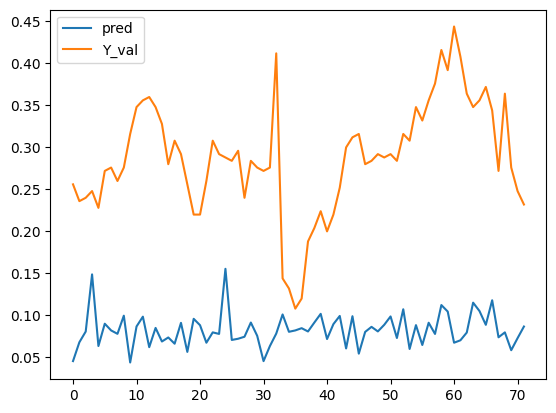

In [26]:
#첫번째 데이터의 첫번째 PM2.5 관측소 예측값
plt.plot(np.arange(72), GRU_prediction[0, :, 0], label='pred')
plt.plot(np.arange(72), Y_val[0, :, 0], label='Y_val')
plt.legend()

In [24]:
Y_val[:, 0, 1]

array([0.248, 0.24 , 0.244, ..., 0.048, 0.072, 0.044])

In [25]:
GRU_prediction[:, 0, 0]

array([0.04552327, 0.04561427, 0.04575144, ..., 0.0456537 , 0.04585592,
       0.04573365], dtype=float32)

In [27]:
#GRU - 2
#model -1 에 비해 GRU layer 하나 적음
def GRU_model_2(X_train, Y_train, X_val):
    from keras.models import Sequential
    from keras.layers import Dense, SimpleRNN, GRU, Permute
    from keras.optimizers import SGD

    # The GRU architecture
    my_GRU_model = Sequential()
    #my_GRU_model.add(keras.layers.Flatten())
    my_GRU_model.add(GRU(units = 48,
                         return_sequences = True,
                         input_shape = ((48, 261)),
                         activation = 'tanh'))
    print(my_GRU_model.output_shape)

    my_GRU_model.add(GRU(units = 72,
                         return_sequences = True,
                         activation = 'tanh'))
    print(my_GRU_model.output_shape)

    my_GRU_model.add(Permute((2, 1), input_shape=(48, 72)))
    print(my_GRU_model.output_shape)

    my_GRU_model.add(Dense(units = 17))
    print(my_GRU_model.output_shape)

    # Compiling the RNN
    my_GRU_model.compile(optimizer = SGD(lr = 0.02, decay = 1e-6,
                                         momentum = 0.2, nesterov = False),
                         loss = 'mean_squared_error')

    # Fitting to the trainig set
    my_GRU_model.fit(X_train, Y_train, epochs = 30, batch_size = 2351, verbose = 1)

    GRU_prediction = my_GRU_model.predict(X_val)
    #GRU_prediction = sc.inverse_transform(GRU_prediction)

    return my_GRU_model, GRU_prediction

# (batch_size, time_seq, features)

In [28]:
my_GRU_model2, GRU_prediction2 = GRU_model_2(X_train, Y_train, X_val)

(None, 48, 48)
(None, 48, 72)
(None, 72, 48)
(None, 72, 17)


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/30
13/13 [==============================] - 4s 97ms/step - loss: 0.1519
Epoch 2/30
13/13 [==============================] - 1s 93ms/step - loss: 0.0833
Epoch 3/30
13/13 [==============================] - 1s 94ms/step - loss: 0.0542
Epoch 4/30
13/13 [==============================] - 1s 96ms/step - loss: 0.0393
Epoch 5/30
13/13 [==============================] - 1s 96ms/step - loss: 0.0305
Epoch 6/30
13/13 [==============================] - 1s 97ms/step - loss: 0.0249
Epoch 7/30
13/13 [==============================] - 1s 96ms/step - loss: 0.0210
Epoch 8/30
13/13 [==============================] - 2s 128ms/step - loss: 0.0182
Epoch 9/30
13/13 [==============================] - 2s 136ms/step - loss: 0.0161
Epoch 10/30
13/13 [==============================] - 1s 94ms/step - loss: 0.0145
Epoch 11/30
13/13 [==============================] - 1s 94ms/step - loss: 0.0132
Epoch 12/30
13/13 [==============================] - 1s 94ms/step - loss: 0.0122
Epoch 13/30
13/13 [================

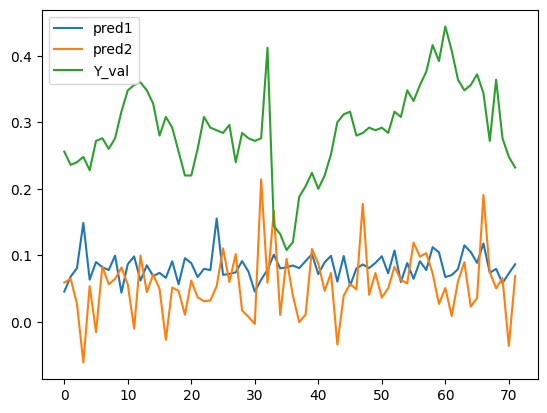

In [29]:
plt.plot(np.arange(72), GRU_prediction[0, :, 0], label='pred1')
plt.plot(np.arange(72), GRU_prediction2[0, :, 0], label='pred2')
plt.plot(np.arange(72), Y_val[0, :, 0], label='Y_val')
plt.legend()

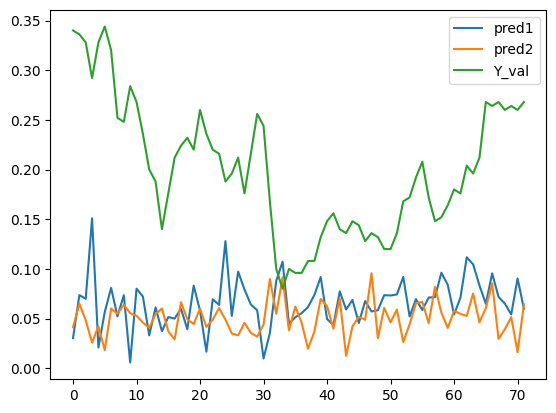

In [30]:
plt.plot(np.arange(72), GRU_prediction[100, :, 10], label='pred1')
plt.plot(np.arange(72), GRU_prediction2[100, :, 10], label='pred2')
plt.plot(np.arange(72), Y_val[100, :, 10], label='Y_val')
plt.legend()

같은 데이터셋으로 모델을 변경해보았지만 개선이 전혀 되지 않음.


-> 데이터셋 바꾸기

1. input의 데이터를 AWS / PM2.5로 나누어서 두 input에 대해 따로 network 만들어서 합친 후 Dense

2. input 에서 위 경도 삭제

3. scaling

4. 그냥 미세먼지 관측소 별로 모델 따로 만들기

위/경도 개수 : 2 * (30 + 17) = 94
위/경도 삭제 시 input length : 261 - 94 = 167 ( 기존의 63% )